In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import scale
import seaborn as sns

In [2]:
mnist=pd.read_csv('C:\\UpGrad\\SVM\\MNIST\\train.csv')

In [3]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


- We see that their are 42k rows and 785 columns(28*28 pixels)

### Objective
#### Correctly classify the handwritten digits from 0-9 based on the pixel values given as features

In [4]:
mnist.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

- We see that their are no columns with null values.

In [5]:
mnist.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


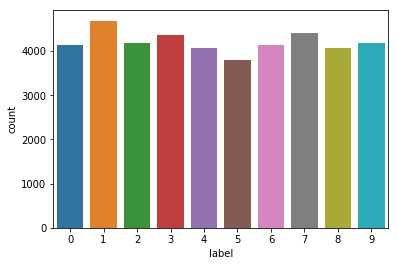

In [6]:
sns.countplot(x='label',data=mnist)

- We see that their are more no of 1's compared to other digits.

In [7]:
mnist.drop_duplicates(inplace=True)

In [8]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.9 MB


- We can see that their are no duplicate rows present.

In [9]:
mnist_1=mnist[:5000].copy()

- Since it takes lot amount of time to process in normal computers for gridsearch we just take 5000 records to train and test the initial data. 

In [10]:
y_train=mnist_1.pop('label')
x_train=mnist_1

In [11]:
x_train=scale(x_train)

In [12]:
x_train.shape

(5000, 784)

In [13]:
from sklearn.decomposition import PCA

- Here we use PCA because:
- It helps in dimensionality reduction,by creating principle components.
- These componets are non correlated and orthogonal to each other.
- Here we not not need to know the fetaures as these columns indicate pixels,we are more interested in prediction accuracy.

In [14]:
pca=PCA(svd_solver='randomized',random_state=100)

In [15]:
pca.fit_transform(x_train)

array([[-5.17346403e+00, -5.09710333e+00,  3.53476084e+00, ...,
        -6.02284507e-17, -1.46368267e-16,  4.80987723e-29],
       [ 1.90775981e+01,  6.51409309e+00,  7.61998446e-01, ...,
         1.35339108e-16, -3.69001581e-17, -2.96103090e-28],
       [-7.72290268e+00, -1.78511374e+00,  2.15372302e+00, ...,
        -2.98134285e-17, -7.97797427e-17,  3.12154247e-28],
       ...,
       [ 1.34918424e+00, -5.86869667e+00, -5.92602865e+00, ...,
         8.89283491e-18, -2.99440914e-18, -7.27613077e-29],
       [-5.12303931e+00,  6.61395468e-01, -6.17158192e+00, ...,
        -9.09317267e-18,  7.47882101e-18, -5.99275006e-29],
       [-5.70637226e+00, -3.05926130e+00, -5.04439650e+00, ...,
        -1.41388074e-17, -1.78701011e-17,  1.03132931e-28]])

Text(0,0.5,'Explained variance ratio')

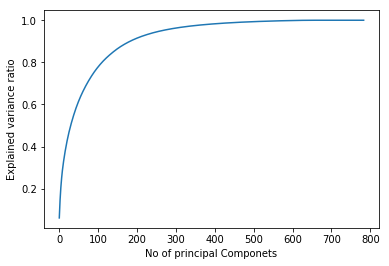

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of principal Componets')
plt.ylabel('Explained variance ratio')

- We can see from the above plot about 300 PC are able to explain close to 95% of the data.

In [17]:
from sklearn.decomposition import IncrementalPCA
pca_final =  IncrementalPCA(n_components=300)

### Thus we perform PCA 

In [18]:
df_train_pca=pca_final.fit_transform(x_train)
df_train_pca.shape

(5000, 300)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
mnist_test=mnist[10000:15000].copy()

In [21]:
y_test=mnist_test.pop('label')
x_test=mnist_test

In [22]:
x_test=scale(x_test)

In [23]:
df_test_pca=pca_final.transform(x_test)

In [24]:
df_test_pca.shape

(5000, 300)

In [25]:
svc=SVC(kernel='linear')
svc.fit(df_train_pca,y_train)
y_test_pred=svc.predict(df_test_pca)

In [26]:
print(accuracy_score(y_true=y_test,y_pred=y_test_pred))

0.902


#### we can see from the above output when we test on normal linear model without identifying C value we are able to get accuracy of 90%

In [28]:
folds=KFold(n_splits=4,random_state=101,shuffle=True)

model=SVC(kernel='rbf')

hyper_parms=[{'gamma':[1e-2,1e-3,1e-4],
            'C':[1,10,100,1000]}]

gridcv=GridSearchCV(cv=folds,estimator=model,return_train_score=True,scoring='accuracy',verbose=1,param_grid=hyper_parms,n_jobs=-1)

gridcv.fit(df_train_pca,y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.7min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

- We use n_jobs=-1 which uses all the processors else this will take several minutes,if data is more it may take hours.

In [29]:
cv_result=pd.DataFrame(gridcv.cv_results_)

In [30]:
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,27.628316,1.104324,4.079341,0.151010,1,0.01,"{'C': 1, 'gamma': 0.01}",0.7320,0.7536,0.7360,0.7376,0.7398,0.008224,12,0.999733,0.999733,1.000000,1.000000,0.999867,0.000133
1,8.684627,0.306613,2.768107,0.159137,1,0.001,"{'C': 1, 'gamma': 0.001}",0.9224,0.9192,0.9208,0.9192,0.9204,0.001327,5,0.972533,0.973067,0.972267,0.970133,0.972000,0.001116
2,13.128096,0.191994,3.354115,0.148285,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.8872,0.8960,0.8864,0.8904,0.8900,0.003774,8,0.906133,0.906133,0.907467,0.907200,0.906733,0.000607
3,28.900407,0.962588,3.850248,0.117829,10,0.01,"{'C': 10, 'gamma': 0.01}",0.7456,0.7752,0.7552,0.7560,0.7580,0.010741,9,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,7.114212,0.365447,2.214637,0.202368,10,0.001,"{'C': 10, 'gamma': 0.001}",0.9288,0.9312,0.9256,0.9288,0.9286,0.001990,1,0.998933,0.999200,0.999200,0.999467,0.999200,0.000189


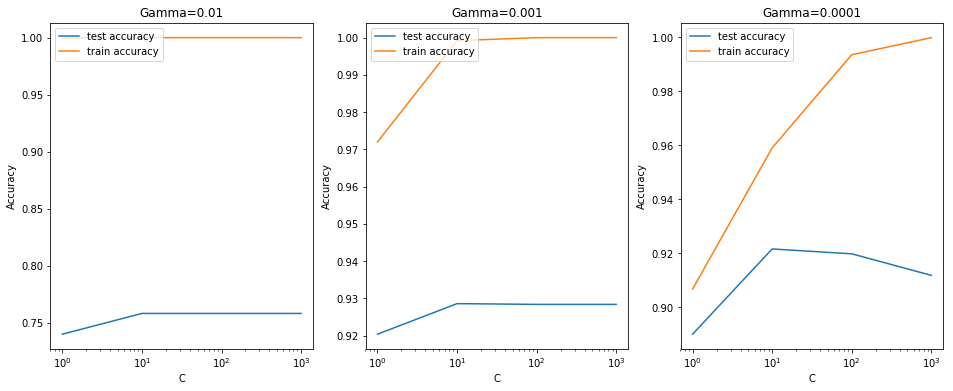

In [31]:
cv_result['param_C']=cv_result['param_C'].astype('int')

plt.figure(figsize=(16,6))

plt.subplot(131)

gamma_01=cv_result[cv_result['param_gamma']==0.01]

plt.plot(gamma_01['param_C'],gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'],gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


plt.subplot(132)
gamma_001 = cv_result[cv_result['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_result[cv_result['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

- We can clearly see from the above graphs as the gamma value is increasing the accuracy for the test is getting dropped.
- This is the clear indiction that data is linear.
- So it is better to go with linear or poly kernal rather that rbf kernal which is more complex.

In [32]:
print(gridcv.best_params_)
print(gridcv.best_score_)

{'C': 10, 'gamma': 0.001}
0.9286


- We see that best value of C is 10 and gamma is 0.01.

In [48]:
svc=SVC(kernel='rbf',gamma=0.001,C=10)
svc.fit(df_train_pca,y_train)
y_test_pred=svc.predict(df_test_pca)
print(accuracy_score(y_true=y_test,y_pred=y_test_pred))

0.9362


- With the above parametrs when we design svm model we are able to get accuracy of 93.6%.

In [34]:
svc_pol=SVC(kernel='poly',C=10)
svc_pol.fit(df_train_pca,y_train)

y_pred_poly=svc_pol.predict(df_test_pca)

In [35]:
print(accuracy_score(y_true=y_test,y_pred=y_pred_poly))

0.9486


- Thus when we try out with poly kernal for C=10 we are able to get accuracy of 94.8%.

In [36]:
svc=SVC(kernel='linear',C=10)
svc.fit(df_train_pca,y_train)

y_pred_poly=svc.predict(df_test_pca)

In [37]:
print(accuracy_score(y_true=y_test,y_pred=y_pred_poly))

0.902


- This from above all options we can clearly conclude that polynomial is performing far better than other 2 kernals.

In [52]:
df_mytest=mnist[5000:40000].copy()
y_mytest=df_mytest.pop('label')
x_mytest=df_mytest
x_mytest=scale(x_mytest)

In [53]:
pca_mytest=pca_final.transform(x_mytest)

In [54]:

ypred_mytest=svc_pol.predict(pca_mytest)
print(accuracy_score(y_true=y_mytest,y_pred=ypred_mytest))

0.945


- This when we see with higher amount of data we are still able to get 94.5% of accuracy with Poly.

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(confusion_matrix(y_true=y_mytest,y_pred=ypred_mytest))

[[3356    0   18    2    7    9   20    0   26    3]
 [   0 3837   19    7    7    2    5    5   13    6]
 [  19   11 3197   29   35    2    8   19  109   13]
 [  13    4   69 3335    3   53    4   14  157   21]
 [   5   11   17    1 3211    8   13    5   19   79]
 [  12    0   10   62   18 2950   37    7   47   21]
 [  13    4   17    0    9   39 3280    0   43    0]
 [   4   17   24    1   46    2    0 3428   26  145]
 [  10    8   29   24   13   49    6    6 3247   15]
 [   8    4   30   23  100    9    0   51   46 3234]]


In [44]:
con_mat=confusion_matrix(y_true=y_mytest,y_pred=ypred_mytest)

In [45]:
j=0;a=[]
print('Accuracy scores of each class')
for i in con_mat:
    print('Class{0} ={1}'.format(j,i[j]/sum(i)))
    a.append(i[j]/sum(i))
    j=j+1
print('Over All average = {0}'.format(np.average(a)))

Accuracy scores of each class
Class0 =0.975297878523685
Class1 =0.9835939502691617
Class2 =0.9288204532248693
Class3 =0.9079771304111081
Class4 =0.9531018106262986
Class5 =0.9323640960809102
Class6 =0.9632892804698973
Class7 =0.9282426211751963
Class8 =0.9530378632227766
Class9 =0.922681883024251
Over All average = 0.9448406967028153


- we ca see that all the classes have accuracy more than 90%.

In [46]:
print(classification_report(y_true=y_mytest,y_pred=ypred_mytest))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      3441
          1       0.98      0.98      0.98      3901
          2       0.93      0.93      0.93      3442
          3       0.96      0.91      0.93      3673
          4       0.93      0.95      0.94      3369
          5       0.94      0.93      0.94      3164
          6       0.97      0.96      0.97      3405
          7       0.97      0.93      0.95      3693
          8       0.87      0.95      0.91      3407
          9       0.91      0.92      0.92      3505

avg / total       0.95      0.94      0.95     35000

